#                               House Prices Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


### Read Data

In [2]:
housing = pd.read_csv('train.csv')
housing = housing.set_index('Id')
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [4]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
housing = housing.drop(columns = ['Alley', 'Fence', 'MiscFeature', 'PoolQC'])

### Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBBC69C048>,
      dtype=object)

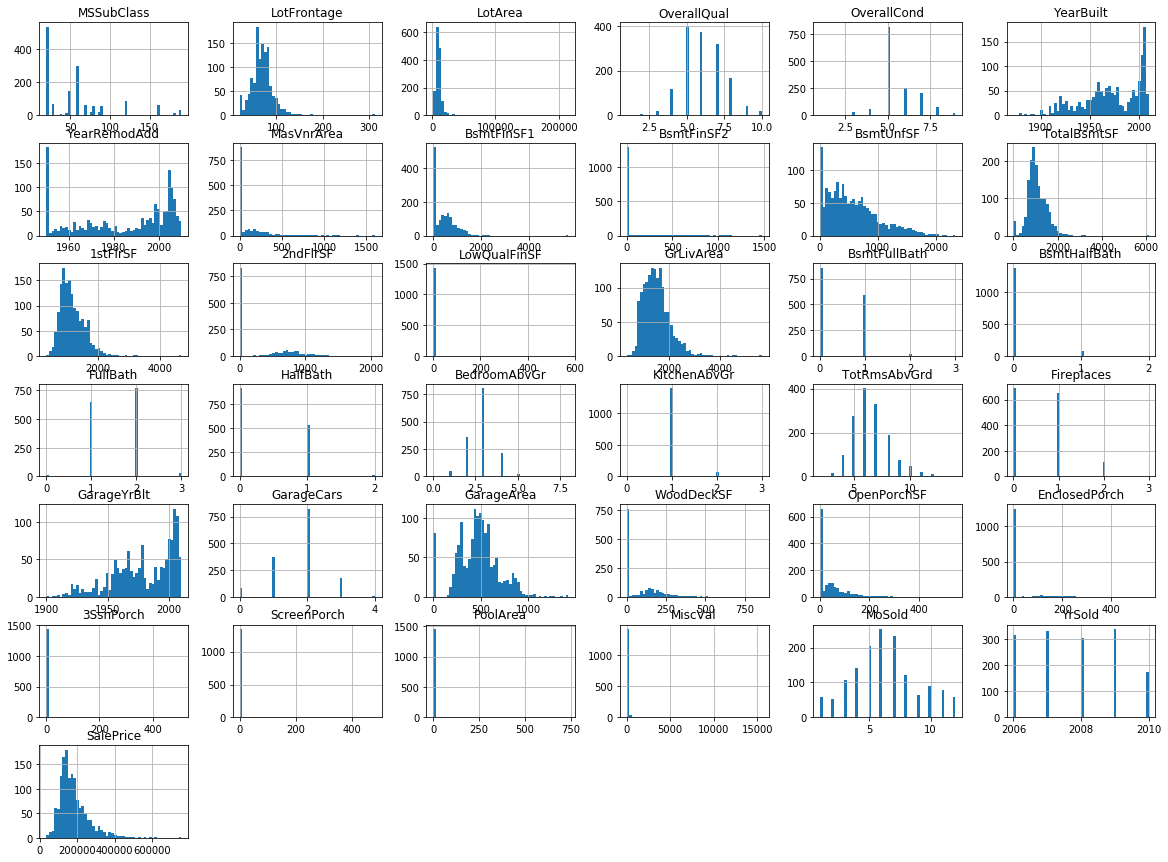

In [7]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))

In [8]:
corr_matrix = housing.corr()

In [9]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### Train and Test Split

In [10]:
train, test = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
train_labels = train["SalePrice"].copy()
X_train = train.drop("SalePrice", axis=1)

### Preprocessing Pipelines

In [12]:
housing_num = X_train.select_dtypes(include=[np.number])

In [13]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="mean")),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [14]:
housing_num_tr

array([[-0.8667643 , -0.01531368, -0.21289571, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.07410996, -0.50521084, -0.26524463, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.63154574, -0.14892199, -0.17784146, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [-0.8667643 , -0.46067473, -0.23409563, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [-0.16110861, -0.68335526, -0.28337613, ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 1.48542135, -0.77242747, -0.65139925, ..., -0.09274033,
        -0.13341669,  0.89367742]])

In [15]:
housing_cat_ordinal = X_train[['LotShape', 'LandContour', 'LandSlope', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                                         'GarageCond']]
housing_cat_ordinal.head()

,LotShape,LandContour,LandSlope,KitchenQual,FireplaceQu,GarageQual,GarageCond
Id,,,,,,,
255,Reg,Lvl,Gtl,TA,NaN,TA,TA
1067,IR1,Lvl,Gtl,TA,TA,TA,TA
639,Reg,Lvl,Gtl,TA,NaN,NaN,NaN
800,Reg,Lvl,Gtl,Gd,TA,TA,TA
381,Reg,Lvl,Gtl,Gd,Gd,TA,TA


In [16]:
categories_all = [['Reg','IR1', 'IR2', 'IR3'], ['Lvl', 'Bnk', 'HLS', 'Low'], ['Gtl', 'Mod', 'Sev'], ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
                 ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], 
                  ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']]

cat_ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories = categories_all))
    ])
housing_cat_ordinal_tr = cat_ordinal_pipeline.fit_transform(housing_cat_ordinal)
housing_cat_ordinal_tr

array([[0., 0., 0., ..., 1., 2., 2.],
       [1., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 1., 2., 2.],
       ...,
       [0., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.]])

In [17]:
housing_cat_ordinal_tr.shape

(1168, 7)

In [18]:
housing_cat = X_train.select_dtypes(exclude=[np.number])
housing_cat_nominal = housing_cat.drop(columns = ['LotShape', 'LandContour', 'LandSlope', 'KitchenQual', 'FireplaceQu', 'GarageQual',
                                         'GarageCond'])
housing_cat_nominal.head()

,MSZoning,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
255,RL,Pave,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,...,GasA,TA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1067,RL,Pave,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,GasA,Gd,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
639,RL,Pave,AllPub,Inside,Edwards,Feedr,Norm,1Fam,1Story,Gable,...,GasA,Gd,Y,FuseA,Typ,NaN,NaN,P,WD,Normal
800,RL,Pave,AllPub,Corner,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,...,GasA,Ex,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Normal
381,RL,Pave,AllPub,Inside,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,...,GasA,TA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Normal


In [19]:
cat_nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])
housing_cat_nominal_tr = cat_nominal_pipeline.fit_transform(housing_cat_nominal)
housing_cat_nominal_tr

<1168x216 sparse matrix of type '<class 'numpy.float64'>'
	with 37376 stored elements in Compressed Sparse Row format>

In [20]:
num_attribs = list(housing_num)
cat_nominal_attribs = list(housing_cat_nominal)
cat_ordinal_attribs = list(housing_cat_ordinal)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat_nom", cat_nominal_pipeline, cat_nominal_attribs),
("cat_ord", cat_ordinal_pipeline, cat_ordinal_attribs)
])
housing_prepared = full_pipeline.fit_transform(X_train)

In [21]:
housing_prepared

<1168x259 sparse matrix of type '<class 'numpy.float64'>'
	with 84378 stored elements in Compressed Sparse Row format>

In [22]:
housing_prepared.shape

(1168, 259)

In [23]:
X_train_prepared = housing_prepared.toarray()
X_train_prepared

array([[-0.8667643 , -0.01531368, -0.21289571, ...,  1.        ,
         2.        ,  2.        ],
       [ 0.07410996, -0.50521084, -0.26524463, ...,  2.        ,
         2.        ,  2.        ],
       [-0.63154574, -0.14892199, -0.17784146, ...,  1.        ,
         2.        ,  2.        ],
       ...,
       [-0.8667643 , -0.46067473, -0.23409563, ...,  1.        ,
         2.        ,  2.        ],
       [-0.16110861, -0.68335526, -0.28337613, ...,  1.        ,
         2.        ,  2.        ],
       [ 1.48542135, -0.77242747, -0.65139925, ...,  2.        ,
         2.        ,  2.        ]])

In [24]:
test_labels = test["SalePrice"].copy()
X_test = test.drop("SalePrice", axis=1)

In [25]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared = X_test_prepared.toarray()
test_labels = test["SalePrice"].copy()

### DNN Model With Hypertuning 

In [26]:
from keras_tuner import HyperModel
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 200, 560, 8),
                activation='relu',
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 200, 560, 8),
                activation='relu'
            )
        )

        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
                
        model.add(layers.Dense(1))
        
        
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['mean_squared_error'])
        
        
        return model

In [27]:
input_shape = (X_train_prepared.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [28]:
from keras_tuner import BayesianOptimization

tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_mean_squared_error',
            max_trials=50,
            seed=42,
            executions_per_trial=2
        )
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=30)
tuner_bo.search(X_train_prepared, train_labels, epochs=100, validation_split=0.2, verbose=0, callbacks=[stop_early])
best_model = tuner_bo.get_best_models(num_models=1)[0]
evaluation = best_model.evaluate(X_test_prepared, test_labels)
evaluation

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit
10/10 [==============================] - 1s 4ms/step - loss: 778038976.0000 - mean_squared_error: 778038976.0000


[778038976.0, 778038976.0]

In [29]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               52000     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 92,401
Trainable params: 92,401
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Get the optimal hyperparameters
best_hps=tuner_bo.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in th densely-connected
layers is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in th densely-connected
layers is 200 and the optimal learning rate for the optimizer
is 0.01.



In [31]:
best_hps.values

{'dropout': 0.0, 'learning_rate': 0.01, 'units': 200}

In [32]:
# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
history = best_model.fit(X_train_prepared, train_labels, epochs=50, validation_split=0.2)

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
30/30 [==============================] - 1s 11ms/step - loss: 234726512.0000 - mean_squared_error: 234726512.0000 - val_loss: 390899744.0000 - val_mean_squared_error: 390899744.0000
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 230816592.0000 - mean_squared_error: 230816592.0000 - val_loss: 386432000.0000 - val_mean_squared_error: 386432000.0000
Epoch 3/50
30/30 [==============================] - 0s 9ms/step - loss: 224475488.0000 - mean_squared_error: 224475488.0000 - val_loss: 378811808.0000 - val_mean_squared_error: 378811808.0000
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 214657824.0000 - mean_squared_error: 214657824.0000 - val_loss: 388189632.0000 - val_mean_squared_error: 388189632.0000
Epoch 5/50
30/30 [==============================] - 0s 7ms/step - loss: 213878128.0000 - mean_squared_error: 213878128.0000 - val_loss: 399049952.0000 - val_mean_squared_error: 399049952.0000
Epoch 6/50
30/30 [=====================

30/30 [==============================] - 0s 6ms/step - loss: 137239168.0000 - mean_squared_error: 137239168.0000 - val_loss: 453197408.0000 - val_mean_squared_error: 453197408.0000
Epoch 44/50
30/30 [==============================] - 0s 5ms/step - loss: 139770736.0000 - mean_squared_error: 139770736.0000 - val_loss: 424060448.0000 - val_mean_squared_error: 424060448.0000
Epoch 45/50
30/30 [==============================] - 0s 6ms/step - loss: 133889696.0000 - mean_squared_error: 133889696.0000 - val_loss: 432299264.0000 - val_mean_squared_error: 432299264.0000
Epoch 46/50
30/30 [==============================] - 0s 5ms/step - loss: 131884992.0000 - mean_squared_error: 131884992.0000 - val_loss: 431809280.0000 - val_mean_squared_error: 431809280.0000
Epoch 47/50
30/30 [==============================] - 0s 5ms/step - loss: 131680008.0000 - mean_squared_error: 131680008.0000 - val_loss: 438397952.0000 - val_mean_squared_error: 438397952.0000
Epoch 48/50
30/30 [============================

In [33]:
history = best_model.fit(X_train_prepared, train_labels, epochs=best_epoch, validation_split=0.2)

Epoch 1/3
30/30 [==============================] - 0s 13ms/step - loss: 123557176.0000 - mean_squared_error: 123557176.0000 - val_loss: 454237344.0000 - val_mean_squared_error: 454237344.0000
Epoch 2/3
30/30 [==============================] - 0s 9ms/step - loss: 125224816.0000 - mean_squared_error: 125224816.0000 - val_loss: 435786688.0000 - val_mean_squared_error: 435786688.0000
Epoch 3/3
30/30 [==============================] - 0s 8ms/step - loss: 120031976.0000 - mean_squared_error: 120031976.0000 - val_loss: 458793024.0000 - val_mean_squared_error: 458793024.0000


In [34]:
eval_result = best_model.evaluate(X_test_prepared, test_labels)
eval_result

10/10 [==============================] - 0s 3ms/step - loss: 775527680.0000 - mean_squared_error: 775527680.0000


[775527680.0, 775527680.0]

In [35]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 808811072])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

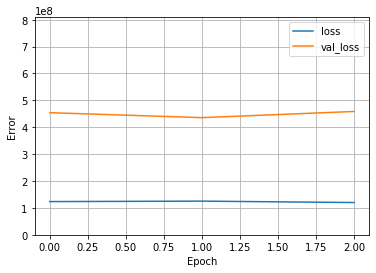

In [36]:
plot_loss(history)

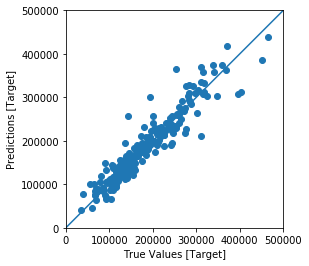

In [37]:
test_predictions = best_model.predict(X_test_prepared).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Target]')
plt.ylabel('Predictions [Target]')
lims = [0, 500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [38]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(test_labels, test_predictions))

0.14292139303807966